In [9]:
# number 1
# Euclidean distance.
# Get sum of each element in vector x and y subtract them and get square. Return sqrt of the summation
def calc_euclidean_distance(x, y):
    import math
    sum_ = 0.0
    for i in range(len(x)):
        sum_ += (x[i] - y[i]) ** 2
    return math.sqrt(sum_)


In [10]:
# number 2
# Manhattan ditance. subtract elements of vector x and y then sum it all up.
def calc_manhattan_distance(x, y):
    sum_ = 0
    for i in range(len(x)):
        sum_ = sum_ + x[i] - y[i]
    return sum_


In [11]:
# number 3
def calc_accuracy_generalization_error(predicted_vector, actual_vector):
    count = 0
    for i in range(len(predicted_vector)):
        if predicted_vector[i] == actual_vector[i]:
            count += 1
    # Return a set of accuracy, generalization error pairs
    return count / len(predicted_vector), 1 - count / len(predicted_vector)


In [12]:
# # number 4
# Calculate precision by comparing data inided predicted and actual vector
def calc_precision(predicted_vector, actual_vector):
    fp = 0
    tp = 0
    for i in range(len(predicted_vector)):
        if predicted_vector[i] == 1 and actual_vector[i] == 1:
            tp += 1
        if predicted_vector[i] == 1 and actual_vector[i] == 0:
            fp += 1
    return tp / (tp + fp)


In [13]:
# number 4
def calc_recall(predicted_vector, actual_vector):
    fn = 0
    tp = 0
    for i in range(len(predicted_vector)):
        if predicted_vector[i] == 1 and actual_vector[i] == 1:
            tp += 1
        if predicted_vector[i] == 0 and actual_vector[i] == 1:
            fn += 1
    return tp / (tp + fn)


In [14]:
# number 4
def calc_f1(predicted_vector, actual_vector):
    fp = 0
    tp = 0
    fn = 0
    for i in range(len(predicted_vector)):
        if predicted_vector[i] == 1 and actual_vector[i] == 1:
            tp += 1
        if predicted_vector[i] == 0 and actual_vector[i] == 1:
            fn += 1
        if predicted_vector[i] == 1 and actual_vector[i] == 0:
            fp += 1
    return tp / (tp + ((fn + fp) / 2))


In [15]:
# number 5
def compute_confusion_matrix(predicted_vector, actual_vector):
    # Manually create a confusion matrix using different points
    confusion_matrix = [[0, 0], [0, 0]]
    for i in range(len(predicted_vector)):
        if predicted_vector[i] == 1 and actual_vector[i] == 1:
            # True positive
            confusion_matrix[1][1] += 1
        if predicted_vector[i] == 0 and actual_vector[i] == 1:
            # False Negative
            confusion_matrix[1][0] += 1
        if predicted_vector[i] == 1 and actual_vector[i] == 0:
            # False Positive
            confusion_matrix[0][1] += 1
        else:
            # True negative
            confusion_matrix[0][0] += 1
    return confusion_matrix


In [16]:
# 6
def generate_ROC_curve(predicted_vector, score):
    # Threshold points we will be going through
    threshold_pts = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0]
    # Default 1's in each fpr and tpr
    fpr = []
    tpr = []
    for threshold in threshold_pts:
        tp = 0
        fp = 0
        fn = 0
        tn = 0
        # if the current probability of a given point is greater than threshold
        # that means  a 1 is  tp and 0 is fp
        for i in range(len(predicted_vector)):
            if score[i] >= threshold:
                if predicted_vector[i] == 1:
                    tp += 1
                if predicted_vector[i] == 0:
                    fp += 1
            else:
                # if probability is smaller than threshold than a 1 is fp and a 0 is fn
                if predicted_vector[i] == 1:
                    fn += 1
                if predicted_vector[i] == 0:
                    tn += 1
        # print("tp: " + str(tp))
        # print("fp: " + str(fp))
        # print("tn: " + str(tn))
        # print("fn: " + str(fn))
        if fp + tn == 0:
            fpr.append(0)
            tpr.append(tp / (tp + fn))
        elif tp + fn == 0:
            fpr.append(fp / (fp + tn))
            tpr.append(0)
        else:
            fpr.append(fp / (fp + tn))
            tpr.append(tp / (tp + fn))
    # plot our fpr vs tpr plot
    import matplotlib.pyplot as pltt
    pltt.plot(fpr, tpr, color='darkorange', lw=2)
    pltt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    pltt.xlabel("False Positive")
    pltt.ylabel("Recall")
    pltt.title("Recall vs False Positive")
    pltt.show()
    return tpr, fpr


In [17]:
# number 7
def generate_auc(predicted_vector, score):
    tpr, fpr = generate_ROC_curve(predicted_vector, score)
    AUC = 0
    for i in range(len(tpr) - 1):
        if tpr[i] > tpr[i + 1]:
            if fpr[i] != fpr[i + 1]:
                # AUC + box + are of triangle
                AUC = AUC + (tpr[i + 1] * (fpr[i] - fpr[i + 1])) + (tpr[i] - tpr[i + 1]) * (fpr[i] - fpr[i + 1]) * (
                        1 / 2)
        else:
            AUC += tpr[i] * (fpr[i] - fpr[i + 1])
    print("AUC is: "+ str(AUC))


In [18]:
# number 8
# need to do threshold optimal for roc and this.
# for this it is when recall and precision meet.
def generate_precision_recall_curve(actual, score):
    # Thresholds will be going through
    threshold_pts = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0]
    precision = []
    recall = []
    # make new predicted vecotr (0 or 1) based on thresholds. 1 if score is higher otherwise 0
    # original predicted is actual and new predicted vector is used to formulate fp,fn,tp,tz
    for threshold in threshold_pts:
        p_v = []
        for i in range(len(score)):
            if score[i] >= threshold:
                p_v.append(1)
            else:
                p_v.append(0)
        tp = 0
        fp = 0
        fn = 0
        tn = 0
        for row in range(len(actual)):
            if actual[row] == 1 and p_v[row] == 1:
                tp += 1
            elif actual[row] == 0 and p_v[row] == 1:
                fp += 1
            elif actual[row] == 1 and p_v[row] == 0:
                fn += 1
            else:
                tn += 1
        # print("tp: " + str(tp))
        # print("fp: " + str(fp))
        # print("tn: " + str(tn))
        # print("fn: " + str(fn))
        if tp + fn == 0:
            recall.append(0)
            precision.append(tp / (tp + fp))
        elif tp + fp == 0:
            recall.append(tp / (tp + fn))
            precision.append(0)
        else:
            recall.append(tp / (tp + fn))
            precision.append(tp / (tp + fp))
    threshold = 0
    for i in range(len(precision)):
        if precision[i] == recall[i]:
            threshold = threshold_pts[i]
            break
    # create our precison recall curve
    import matplotlib.pyplot as plt
    plt.plot(threshold_pts, precision, "b--", label="Precision")
    plt.plot(threshold_pts, recall, "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="lower right")
    plt.title('Precision-Recall Curve')
    plt.ylim([0, 1.1])
    plt.show()
    print("Optimal Threshold is: " + str(threshold))


In [19]:
# number 9
class KNN_Classifier:
    X = None
    Y = None
    n_neighbors = 0
    weights = ""
    distance = ''

    def __init__(self):
        pass

    def fit(self, X, Y, n_neighbors, weights='uniform', **kwargs):
        self.X = X
        self.Y = Y
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.distance = kwargs['distance']

    def predict(self, X):
        n_neighbours = self.n_neighbors
        # Returning prediction and scores of predictions
        y_pred = []
        scores = []
        if self.weights == 'uniform':
            for x in X:
                distance = []
                for x_sub_idx in range(len(self.X)):
                    dist = 0
                    if self.distance == 'Euclidean':
                        dist = calc_euclidean_distance(x, self.X[x_sub_idx])
                    if self.distance == 'Manhattan':
                        dist = calc_manhattan_distance(x, self.X[x_sub_idx])
                    # Adding to our list in (index, distance) format.
                    # Index is it's original place in the vector to be used to find label after
                    distance.append((x_sub_idx, dist))
                distance.sort(key=lambda t: t[1])
                # Find the closest neighbours
                neighbours = distance[:n_neighbours]
                # Find labels for these neighbours then get the empirical fraction  (prob of 1 or 0?)
                predictions = []
                for idx in neighbours:
                    # Index from original vector to get label which is used in our prediction
                    predictions.append(self.Y[idx[0]])
                count_1 = 0
                # Could the amount of 1's. Don't need to do for 0's since its one or the other
                for p in predictions:
                    if p == 1:
                        count_1 += 1
                # these probibilities are scores
                if count_1 / n_neighbours > 1 - (count_1 / n_neighbours):
                    y_pred.append(1)
                    scores.append(count_1 / n_neighbours)
                else:
                    y_pred.append(0)
                    scores.append(1 - (count_1 / n_neighbours))
            return y_pred, scores
        elif self.weights == 'distance':
            for x in X:
                distance = []
                for x_sub_idx in range(len(self.X)):
                    dist = 0
                    if self.distance == 'Euclidean':
                        dist = calc_euclidean_distance(x, self.X[x_sub_idx])
                    if self.distance == 'Manhattan':
                        dist = calc_manhattan_distance(x, self.X[x_sub_idx])
                    distance.append((x_sub_idx, dist))
                distance.sort(key=lambda t: t[1])
                neighbours = distance[:n_neighbours]
                # Part that is different from uniform
                sum = 0
                # We grab the inverse sum of all the neighbours
                for idx in neighbours:
                    if self.Y[idx[0]] == 1:
                        if idx[1] == 0:
                            sum += 0
                        else:
                            sum += 1 / idx[1]
                    elif self.Y[idx[0]] == 0:
                        if idx[1] == 0:
                            sum += 0
                        else:
                            sum += 1 / idx[1]
                weighted_1_label = 0
                weighted_0_label = 0
                # After getting the sum we check each neighbour for their labels. We then divide their inversed distance
                # By the sum of all the neighbours. Now the labels will be determined by the larger of the 2 distances
                for idx in neighbours:
                    if self.Y[idx[0]] == 1:
                        if idx[1] == 0:
                            weighted_1_label += 0
                        else:
                            weighted_1_label += (1 / idx[1]) / sum
                    elif self.Y[idx[0]] == 0:
                        if idx[1] == 0:
                            weighted_0_label += 0
                        else:
                            weighted_0_label += (1 / idx[1]) / sum
                # Checking scores and their weights
                if weighted_1_label > weighted_0_label:
                    y_pred.append(1)
                    scores.append(weighted_1_label)
                else:
                    y_pred.append(0)
                    scores.append(weighted_0_label)
            return y_pred, scores
        else:
            raise Exception("Only takes uniform or distance as argument")


In [21]:
# number 10
# http://archive.ics.uci.edu/ml/datasets/wine+quality
import pandas as pd
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
df = pd.read_csv('winequality-white.csv', sep=";")

# number 11
# Convert the data in quality if >5 to 1's  and <=5 to 0's
quality = []
for quality_pos in range(df.shape[0]):
    if df['quality'][quality_pos] > 5:
        quality.append(1)
    else:
        quality.append(0)
df['quality_convert'] = quality

# number 12
for i in df.columns:
    print(df[i].describe())
# number 13
# Randomizing the rows
df = df.sample(frac=1)
# number 14
# Trying to pair here
# df.corr
# Do correlations to figure out what is redundant.
import seaborn as sns
from scipy import stats

# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
                size=24)

cmap = sns.cubehelix_palette(light=1, dark=0.1,
                             hue=0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(df)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color='red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color='red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap=cmap)
g.map_lower(corrfunc);

plt.show()

print(df.corr()['quality'].sort_values(ascending=False))
# %number 15
df = df.drop(labels=['alcohol', 'pH', 'sulphates', 'free sulfur dioxide'], axis=1)


quality                 1.000000
quality_convert         0.802541
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64


In [22]:
# number 16
def partition(feature, target, t):
    _feature_size = len(feature)
    _target_size = len(target)
    _feature_test = feature.head(int(t * _feature_size))
    _feature_train = feature.tail(int((1 - t) * _feature_size))
    _target_test = target.head(int(t * _target_size))
    _target_train = target.tail(int((1 - t) * _target_size))
    _feature_train = _feature_train.values.tolist()
    _feature_test = _feature_test.values.tolist()
    _target_train = _target_train.values.tolist()
    _target_test = _target_test.values.tolist()
    return _feature_train, _feature_test, _target_train, _target_test


In [23]:
# number 17a
knn = KNN_Classifier()
y = df['quality_convert']  # 1D targer vector

X = df.drop(labels='quality_convert', axis=1)

feature_train, feature_test, target_train, target_test = partition(X, y, .3)


In [17]:
# Using uniform weights
kwargs = {'distance' : 'Euclidean'}
knn.fit(X.values.tolist(), y, 5,  'uniform', **kwargs)

predicted_vector, scores = knn.predict(feature_train)

accuracy, error = calc_accuracy_generalization_error(predicted_vector, target_train)
f1 = calc_f1(predicted_vector, target_train)

print("Accuracy before standarizing: "+str(accuracy))
print("F1 before standardizing: "+str(f1))
# number 17b/c
knn_standardized = KNN_Classifier()
import numpy
feature_train = numpy.array(feature_train)
n_feature_train = feature_train - numpy.mean(feature_train,axis=0)
n_feature_train = n_feature_train/numpy.std(feature_train, axis=0)
standadized_feature_train = n_feature_train.tolist()

knn_standardized.fit(X.values.tolist(), y, 5,  'uniform', **kwargs)
standardized_predicted_vector, standardized_score = knn.predict(standadized_feature_train)

s_acc, s_err = calc_accuracy_generalization_error(standardized_predicted_vector, target_train)
s_f1 = calc_f1(standardized_predicted_vector, target_train)
print("Accuracy after standarizing: "+str(s_acc))
print("F1 after standardizing: "+str(s_f1))

Accuracy before standarizing: 0.5869311551925321
F1 before standardizing: 0.7170263788968825
Accuracy after standarizing: 0.6697782963827305
F1 after standardizing: 0.8022361984626135


In [18]:
# number 17e
# Using distance weights
kwargs = {'distance' : 'Euclidean'}
knn.fit(X.values.tolist(), y, 5,  'distance', **kwargs)

predicted_vector, scores = knn.predict(feature_train)

accuracy, error = calc_accuracy_generalization_error(predicted_vector, target_train)
f1 = calc_f1(predicted_vector, target_train)

print("Accuracy before standarizing: "+str(accuracy))
print("F1 before standardizing: "+str(f1))

knn_standardized = KNN_Classifier()
import numpy
feature_train = numpy.array(feature_train)
n_feature_train = feature_train - numpy.mean(feature_train,axis=0)
n_feature_train = n_feature_train/numpy.std(feature_train, axis=0)
standadized_feature_train = n_feature_train.tolist()

knn_standardized.fit(X.values.tolist(), y, 5,  'distance', **kwargs)
standardized_predicted_vector, standardized_score = knn.predict(standadized_feature_train)

s_acc, s_err = calc_accuracy_generalization_error(standardized_predicted_vector, target_train)
s_f1 = calc_f1(standardized_predicted_vector, target_train)
print("Accuracy after standarizing: "+str(s_acc))
print("F1 after standardizing: "+str(s_f1))

Accuracy before standarizing: 0.5618436406067678
F1 before standardizing: 0.6824524312896406
Accuracy after standarizing: 0.6697782963827305
F1 after standardizing: 0.8022361984626135


In [19]:
#number 18
# Standardized data is better
# folds = s
# set 1 fold for testing and the rest for training
# testing calls predict, training calls fit
# save testing labels then test the rest of the partitions.
def sFolds(folds, data, labels, model, model_args, error_function):
    # Creating variables for some math that might be used heavily
    partitioned = 1 / folds
    amt_partition_data = int(partitioned * len(data))
    partition_list = [[] for _ in range(folds)]
    labels_list = [[] for _ in range(folds)]
    res_scores = []
    # Return dict
    res = {'expected': [],
           'predicted:': [],
           'error': []}
    # Lisst for finding the permutation for the max f1 score
    permutation_list = []
    weights = model_args['weights']
    neighbours = model_args['k']
    # Partition the data into different folds
    for data_row in range(0, folds):
        partition_list[data_row] = data[data_row * amt_partition_data:(data_row + 1) * amt_partition_data]
        labels_list[data_row] = labels[data_row * amt_partition_data:(data_row + 1) * amt_partition_data]
        if data_row == folds:
            partition_list[data_row] = data[data_row * amt_partition_data:]
            labels_list[data_row] = labels[data_row * amt_partition_data:]
    # Go through each test data and test it against each fitted data/
    for partitioned_data_rows in range(len(partition_list)):
        for training_data in range(len(partition_list)):
            if partitioned_data_rows != training_data:
                # Start plugging parameters in
                for neighbour in neighbours:
                    kwargs = {'distance': ''}
                    for weight in weights:
                        for dist in model_args['distance']:
                            # Creating permutations here and appending them to list
                            permutation_list.append([str(neighbour) + " " + str(dist) + " " + str(weight)])
                            kwargs['distance'] = dist
                            model.fit(partition_list[partitioned_data_rows], labels_list[partitioned_data_rows],
                                      neighbour, weight, **kwargs)
                            pred, score = model.predict(partition_list[training_data])
                            res_scores.append(score)
                            # Slowly add the results of the classifier to dictionary
                            res['predicted:'].append(pred)
                            res['expected'].append(labels_list[partitioned_data_rows])
                            res['error'].append(error_function(pred, labels_list[partitioned_data_rows]))
    return res, permutation_list


In [39]:
# X = numpy.array(X)
# n_X = X - numpy.mean(X,axis=0)
# n_X = n_X/numpy.std(X, axis=0)
# standadized_X = n_X.tolist()

# Calling our function
res, permutation_list = sFolds(5, X.values.tolist(), y.values.tolist(), KNN_Classifier(),
                               {'k': [1, 5, 9, 11], 'distance': ['Euclidean', 'Manhattan'],
                                'weights': ['uniform', 'distance']}, calc_f1)
max_ = 0
permutation = ''
for i in range(len(res['error'])):
    if res['error'][i] > max_:
        max_ = res['error'][i]
        permutation = permutation_list[i]
# Print the permutation and it's relevant max f1 score
print(permutation)
print(max_)


['1 Manhattan uniform']
0.8147699757869249


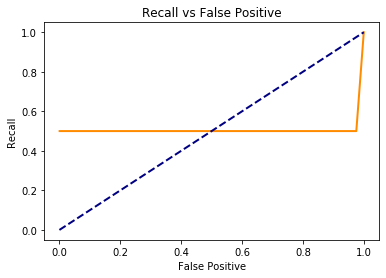

AUC is: 0.5057941376959781


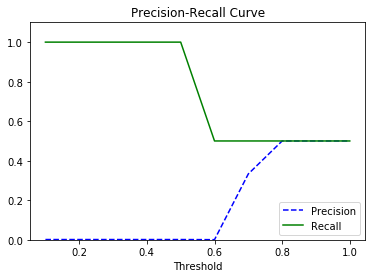

Optimal Threshold is: 0.8


In [24]:
# I chose to use k = 11, weights = distance and distance = manhattan because my initial run had that in permutation_list
# Due to ide bugging out I had to redo everything and now it is giving me k = 1 distance = manhattan and weight = uniform
# However the data is actually non sensical when I run it.
test_model = KNN_Classifier()
kwargs = {'distance': 'Manhattan'}
test_model.fit(X.values.tolist() , y.values.tolist(), 11,  'distance', **kwargs)
pred, score = test_model.predict(feature_test)
generate_auc(pred, score)
generate_precision_recall_curve(pred, score)

In [27]:
z = 1.96
p = calc_accuracy_generalization_error(pred, target_train)
import math
lower_bound = p[0] - z * math.sqrt(p[0]*(1-p[0])/len(feature_test))
upper_bound = p[0] + z * math.sqrt(p[0]*(1-p[0])/len(feature_test))
print("Confidence level of 95% ")
print("Lower bound: " + str(lower_bound))
print("Upper bound: " + str(upper_bound))

Confidence level of 95% 
Lower bound: 0.3711759831294464
Upper bound: 0.42119978269764685


In [25]:
# Data Summary
'''
25a. 
The dataset retains to the different features of wine and the quality the wine is. Variables are fixed acidity, volatile acidity, citric acid,
residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality (score between 0 and 10). 
The target is quality and I am calculating the quality of wine given features that are relevant to the wine.
'''
'''
25b. 
Means are as given
'''
for i in df.columns:
    print(df[i].describe())
'''
25c. 
I am not using scaled features. While the accuracy and f1 were higher than normal data. Using standardized data in the problems to follow
was an issue as it produced data that were nonsensical. 
'''
'''
25d.
I did drop some features. After pairing them up and correlating the columns against each other, I ended up picking 
positive correlations as that's what seemed to be highly correlated. In this case I essentially picked columns
that were greater than 0.
'''

count    4898.000000
mean        6.854788
std         0.843868
min         3.800000
25%         6.300000
50%         6.800000
75%         7.300000
max        14.200000
Name: fixed acidity, dtype: float64
count    4898.000000
mean        0.278241
std         0.100795
min         0.080000
25%         0.210000
50%         0.260000
75%         0.320000
max         1.100000
Name: volatile acidity, dtype: float64
count    4898.000000
mean        0.334192
std         0.121020
min         0.000000
25%         0.270000
50%         0.320000
75%         0.390000
max         1.660000
Name: citric acid, dtype: float64
count    4898.000000
mean        6.391415
std         5.072058
min         0.600000
25%         1.700000
50%         5.200000
75%         9.900000
max        65.800000
Name: residual sugar, dtype: float64
count    4898.000000
mean        0.045772
std         0.021848
min         0.009000
25%         0.036000
50%         0.043000
75%         0.050000
max         0.346000
Name: chloride

"\n25d.\nI did drop some features. After pairing them up and correlating the columns against each other, I ended up picking \npositive correlations as that's what seemed to be highly correlated. In this case I essentially picked columns\nthat were greater than 0.\n"

In [ ]:
# Methods
'''
26a. 
The time complexity of this KNN_Classifier is O(dN^2). This is the case because my predict function is essentially 
brute forcing the dataset and predicting labels.
'''
'''
26b. 
Increasing k essentially increases the accuracy of your prediction. The only time increasing k is when you have either a 
even amount of neighbours (You want old as this will cause tiebreakers) or if classifying the data leans to heavily in 
the data being too specific (In this case k is too small and we should try to make it more generalized).
'''
'''
26c.
I am using distance because it gives me more accurate points. By weighing the points such that the sum of the inversed distance 
the percentages were now tied to how much percent of the labels there were in the neighbours. It gave clearer indication that uniform doesn't do.
'''

In [57]:
# Results
'''
27a.
Below is the performance of the model with respect to different levelsif k and the different parameters. From a quick skim the data seems to fluctuate with different k, weight, and distance.
There are a lot of duplicates but looking at the raw data there are also a lot of duplicated raw data. In terms of performance it definitely could have been better considering the below accuracy
with what I used.
'''
accuracy = []
for i in range(len(res['expected'])):
    accuracy.append(calc_accuracy_generalization_error(res['predicted:'][i], res['expected'][i]))
for i in range(len(accuracy)):
    print("Accuracy: " + str(accuracy[i][0]) + " for Permutation parameters: " + str(permutation_list[i]))

    

Accuracy: 0.5495403472931563 for Permutation parameters: ['1 Euclidean uniform']
Accuracy: 0.35137895812053116 for Permutation parameters: ['1 Manhattan uniform']
Accuracy: 0.5311542390194075 for Permutation parameters: ['1 Euclidean distance']
Accuracy: 0.35137895812053116 for Permutation parameters: ['1 Manhattan distance']
Accuracy: 0.5658835546475995 for Permutation parameters: ['5 Euclidean uniform']
Accuracy: 0.35137895812053116 for Permutation parameters: ['5 Manhattan uniform']
Accuracy: 0.5566905005107252 for Permutation parameters: ['5 Euclidean distance']
Accuracy: 0.35137895812053116 for Permutation parameters: ['5 Manhattan distance']
Accuracy: 0.5740551583248212 for Permutation parameters: ['9 Euclidean uniform']
Accuracy: 0.35137895812053116 for Permutation parameters: ['9 Manhattan uniform']
Accuracy: 0.5689479060265578 for Permutation parameters: ['9 Euclidean distance']
Accuracy: 0.36567926455566907 for Permutation parameters: ['9 Manhattan distance']
Accuracy: 0.5730

In [ ]:
'''
27b.
Overall, the performance of my model could have been better. As far as I could tell, while I was able to link permutations to their respective F1 score it was enough to tell me there's still some level of improvements left to do.
As of right now the data that is passed into my ROC and Precision recall curves is incorrect. It would seem like the data I pass are not as good as they should be.
'''

In [58]:
for i in range(len(res['error'])):
    print("F1 score: "+str(res['error'][i]) + " ---------- " + "Permutation parameters: " + str(permutation_list[i]))
'''
27c. 
As far as good quality values that led to good/bad performance. It is possible that removing duplicate entry data in the original dataset might increase performance due to duplicates values definitely showing up in the calculations.
From my testing Manhattan as a parameter fluctuated a lot as demonstrated below. F1 values can range from anywhere between 0 and .82 (which happen to be the largest F11 value I've encountered). I believe manhattan distance might actually result
in poorer performance because of the fluctuation. Vice versa for Euclidean, I noticed that Euclidean was very consistent in terms of F1 values never having wild fluctations like Manhattan distance.
'''

F1 score: 0.6594594594594595 ---------- Permutation parameters: ['1 Euclidean uniform']
F1 score: 0.0 ---------- Permutation parameters: ['1 Manhattan uniform']
F1 score: 0.6259168704156479 ---------- Permutation parameters: ['1 Euclidean distance']
F1 score: 0.0 ---------- Permutation parameters: ['1 Manhattan distance']
F1 score: 0.6835443037974683 ---------- Permutation parameters: ['5 Euclidean uniform']
F1 score: 0.0 ---------- Permutation parameters: ['5 Manhattan uniform']
F1 score: 0.6741741741741741 ---------- Permutation parameters: ['5 Euclidean distance']
F1 score: 0.0 ---------- Permutation parameters: ['5 Manhattan distance']
F1 score: 0.6958424507658644 ---------- Permutation parameters: ['9 Euclidean uniform']
F1 score: 0.0 ---------- Permutation parameters: ['9 Manhattan uniform']
F1 score: 0.6869436201780416 ---------- Permutation parameters: ['9 Euclidean distance']
F1 score: 0.15739484396200815 ---------- Permutation parameters: ['9 Manhattan distance']
F1 score: 0.

In [ ]:
'''
27d.
In conclusion there could definitely be more improvements made on the code here. I do however believe that my predict function and sFold functions were doing what they had to. I believe that the raw dataset itself
could be optimized to not include duplicates. The duplicates probably caused my code to be unable to decide on a permutation that worked because of duplicate F1 values that occur. My max function find's the first highest F1,
but afterwards can't do anything about subsequent maxes which is also another reason I believe to be my models poorer performance.
'''